# ABM results graphs

In this notebook we load results dataframes from the ABM_simulations_vF notebook and other sources and create all plots in one single notebook. The contents are:

1. Load packages and set directory
2. Admissions distributions
3. Peacetime, "normal" scenarios
    1. Whole hospital
          1. Service levels
          2. Distributions
    2. ICU-level 
          1. Service levels
          2. Distributions
4. Scenarios
    1. Whole hospital
          1. Service levels
          2. Distributions
    2. ICU-level
          1. Service levels
          2. Distributions

# 1. Load packages and set directory

In [134]:
import seaborn as sns
import os
import matplotlib.pyplot as plt
import pickle
import numpy as np
from collections import Counter
import pandas as pd

os.chdir('/.../graphs')

# 2. Admissions distributions

Here we show the probability (Y axis) of admitting a given number of patients each day (on the X axis) for each cluster and ICU (column and row in the facetgrid) combination.

In [86]:
with open('/.../dprob_list.pkl', 'rb') as f:
    group_prob_list = pickle.load(f)
    
os.chdir('/.../graphs')

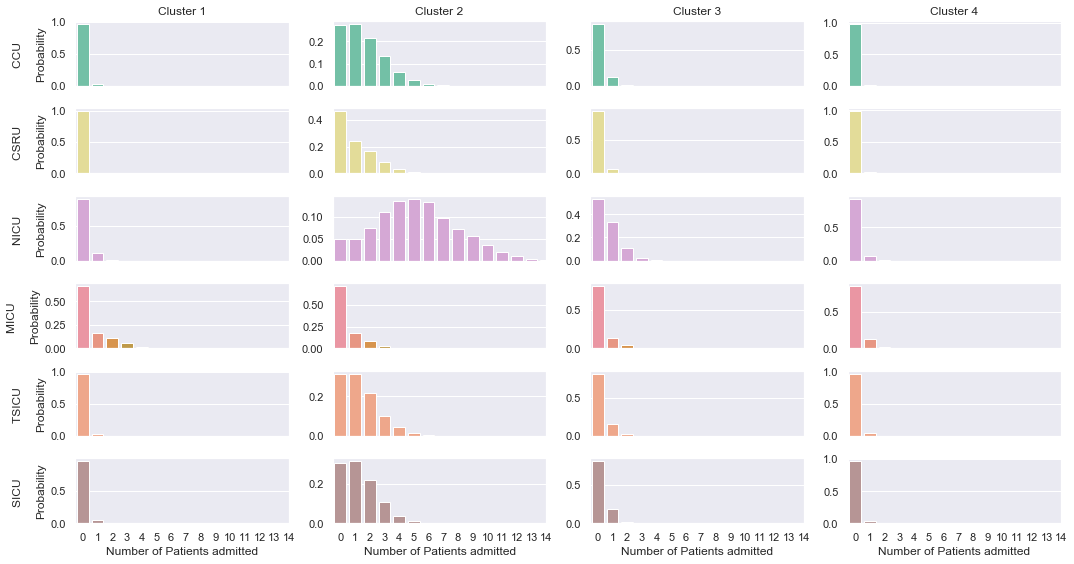

In [89]:
f, axes = plt.subplots(6, 4, figsize=(15, 8), sharex=True, sharey = False)

sns.barplot(x = group_prob_list[0].index, y = group_prob_list[0].iloc[:, 0],  color = 'mediumaquamarine', ax = axes[0,0]).set(  title = "Cluster 1",  xlabel= None, ylabel='CCU \n\nProbability')
sns.barplot(x = group_prob_list[0].index, y = group_prob_list[0].iloc[:, 1],  color = 'mediumaquamarine', ax = axes[0,1]).set(  title = "Cluster 2",  xlabel= None, ylabel= None)
sns.barplot(x = group_prob_list[0].index, y = group_prob_list[0].iloc[:, 2],  color = 'mediumaquamarine', ax = axes[0,2]).set( title = "Cluster 3", xlabel= None, ylabel= None)
sns.barplot(x = group_prob_list[0].index, y = group_prob_list[0].iloc[:, 3],  color = 'mediumaquamarine', ax = axes[0,3]).set(  title = "Cluster 4", xlabel= None, ylabel= None)

sns.barplot(x = group_prob_list[0].index, y = group_prob_list[1].iloc[:, 0],  color = 'khaki', ax = axes[1,0]).set(  xlabel = None, ylabel= 'CSRU \n\nProbability')
sns.barplot(x = group_prob_list[0].index, y = group_prob_list[1].iloc[:, 1],  color = 'khaki', ax = axes[1,1]).set(  xlabel = None, ylabel= None)
sns.barplot(x = group_prob_list[0].index, y = group_prob_list[1].iloc[:, 2],  color = 'khaki', ax = axes[1,2]).set(  xlabel = None, ylabel= None)
sns.barplot(x = group_prob_list[0].index, y = group_prob_list[1].iloc[:, 3],  color = 'khaki', ax = axes[1,3]).set(  xlabel = None, ylabel= None)

sns.barplot(x = group_prob_list[0].index, y = group_prob_list[2].iloc[:, 0],  color = 'plum', ax = axes[2,0]).set(  xlabel= None, ylabel= 'NICU \n\nProbability')
sns.barplot(x = group_prob_list[0].index, y = group_prob_list[2].iloc[:, 1],  color = 'plum', ax = axes[2,1]).set(  xlabel= None, ylabel= None)
sns.barplot(x = group_prob_list[0].index, y = group_prob_list[2].iloc[:, 2],  color = 'plum',  ax = axes[2,2]).set(  xlabel= None, ylabel= None)
sns.barplot(x = group_prob_list[0].index, y = group_prob_list[2].iloc[:, 3],  color = 'plum', ax = axes[2,3]).set(  xlabel= None, ylabel= None)

sns.barplot(x = group_prob_list[0].index, y = group_prob_list[3].iloc[:, 0],   ax = axes[3,0]).set( xlabel= None, ylabel= 'MICU \n\nProbability')
sns.barplot(x = group_prob_list[0].index, y = group_prob_list[3].iloc[:, 1],   ax = axes[3,1]).set( xlabel= None, ylabel= None)
sns.barplot(x = group_prob_list[0].index, y = group_prob_list[3].iloc[:, 2],   ax = axes[3,2]).set( xlabel= None, ylabel= None)
sns.barplot(x = group_prob_list[0].index, y = group_prob_list[3].iloc[:, 3],   ax = axes[3,3]).set( xlabel= None, ylabel= None)

sns.barplot(x = group_prob_list[0].index, y = group_prob_list[4].iloc[:, 0],  color = 'lightsalmon',  ax = axes[4,0]).set(  xlabel= None, ylabel='TSICU \n\nProbability')
sns.barplot(x = group_prob_list[0].index, y = group_prob_list[4].iloc[:, 1],  color = 'lightsalmon',  ax = axes[4,1]).set(  xlabel= None, ylabel=None)
sns.barplot(x = group_prob_list[0].index, y = group_prob_list[4].iloc[:, 2],  color = 'lightsalmon',  ax = axes[4,2]).set(  xlabel= None, ylabel=None)
sns.barplot(x = group_prob_list[0].index, y = group_prob_list[4].iloc[:, 3], color = 'lightsalmon',  ax = axes[4,3]).set(  xlabel= None, ylabel=None)

sns.barplot(x = group_prob_list[0].index, y = group_prob_list[5].iloc[:, 0], color = 'rosybrown',  ax = axes[5,0]).set( xlabel= "Number of Patients admitted", ylabel= 'SICU \n\nProbability')
sns.barplot(x = group_prob_list[0].index, y = group_prob_list[5].iloc[:, 1],  color = 'rosybrown',  ax = axes[5,1]).set( xlabel= "Number of Patients admitted", ylabel= None)
sns.barplot(x = group_prob_list[0].index, y = group_prob_list[5].iloc[:, 2],  color = 'rosybrown',  ax = axes[5,2]).set( xlabel= "Number of Patients admitted", ylabel= None)
sns.barplot(x = group_prob_list[0].index, y = group_prob_list[5].iloc[:, 3],  color = 'rosybrown',  ax = axes[5,3]).set(xlim = (-0.5, 14), xlabel= "Number of Patients admitted", ylabel= None)

plt.tight_layout()
sns.set_style("darkgrid")
sns.set(font_scale=0.8)

f.savefig('ad_priors_pericu_percl.png', dpi=100)

# 3. Peacetime, "Normal scenario"

Here we graph results from the hospital ABM with no special scenario

# ## 3.1 Whole hospital
### 3.1.1 Service levels

Here we graph the number of beds required to meet patient demand for the whole hospital under normal scenario

In [ ]:
# Load files
os.chdir('/.../graphs')

with open('cis_pericu_peace3.pkl', 'wb') as f:
       pickle.dump(cis_per_icu, f)
        
with open('barcounts_pericu_peace3.pkl', 'wb') as f:
       pickle.dump(count_df, f)
        
with open('counts_peace3.pkl', 'wb') as f:
       pickle.dump(icu_counts, f)

In [235]:
os.chdir('/.../graphs')

with open('barcounts_pericu_peace3.pkl', 'rb') as f:
    count_df = pickle.load(f)
        
with open('counts_peace3.pkl', 'rb') as f:
       icu_counts = pickle.load(f)

nicu_count_df = count_df.loc[ :, 'NICU']
count_df = count_df.drop('NICU', axis = 1)

In [237]:
# Add results for whole hospital together excluding the NICU (Neonatal unit, which has beds not transferable to adults)
wh_counts = [icu_counts[0][i]+ icu_counts[1][i]+ icu_counts[3][i]+ icu_counts[4][i]+icu_counts[5][i] for i in range(0, len(icu_counts[0]))]

# Define which confidence levels we wish to calcualte from the distribution
ci_interval = 0.025
ci_range = np.arange(0, 1 + ci_interval, ci_interval)

# Calculate Confidence levels in order to be able to plot service graphs
wh_peace_cis = []
nicu_peace_cis = []
for j, ci in enumerate(ci_range):
    
    wh_peace_cis.append(np.quantile(wh_counts, ci))
    nicu_peace_cis.append(np.quantile(icu_counts[2], ci))
    
# wh_peace_cis
# nicu_peace_cis

NICU_n =  200000.0
Whole hosp (ex-NICU) n =  200000


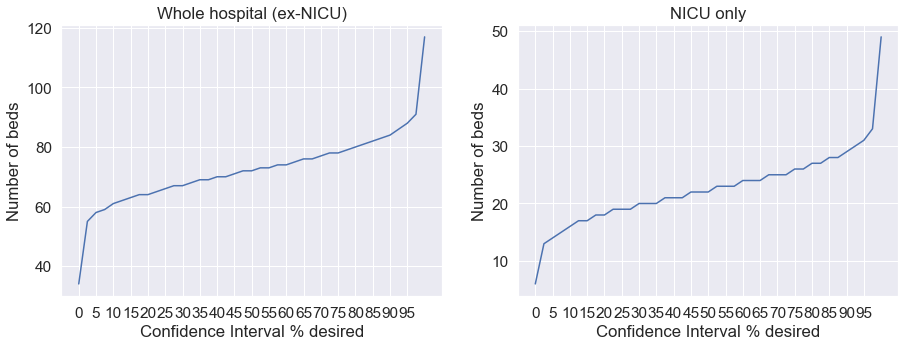

In [232]:
f, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey = False)
""
sns.lineplot(x = np.arange(0,1.025, 0.025), y = wh_peace_cis,  ax = axes[0]).set( title = 'Whole hospital (ex-NICU)', xlabel= 'Confidence Interval % desired', ylabel='Number of beds')
# axes[0].axhline(77, color='red')
sns.lineplot(x = np.arange(0,1.025, 0.025), y = nicu_peace_cis,  ax = axes[1]).set( title = 'NICU only', xlabel= 'Confidence Interval % desired', ylabel='Number of beds')

plt.xticks(ticks = [0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
           labels = [0  , 5, 10 , 15, 20 , 25, 30 , 35, 40 , 45, 50 ,55, 60 , 65, 70 , 75, 80 , 85, 90 , 95])

print('NICU_n = ', np.sum(nicu_count_df))
print('Whole hosp (ex-NICU) n = ', len(wh_counts))

sns.set_style('whitegrid')
sns.set(font_scale=1.4)

# f.savefig('peace_wh_serlevels.png', dpi=100)


### 3.1.2 Distributions

Here we show the distrbution of number of patients in the whole hospital under normal scenario.

In [233]:
wh_count_df = np.zeros([200])
wh_95ci = np.quantile(wh_counts, 0.95)

wh_count_dict = Counter(wh_counts)
    
for key, value in wh_count_dict.items():
        
    wh_count_df[key] = value
        
wh_range = np.arange(0,len(wh_count_df))

NICU_n =  200000.0
Whole hosp (ex-NICU) n =  200000.0


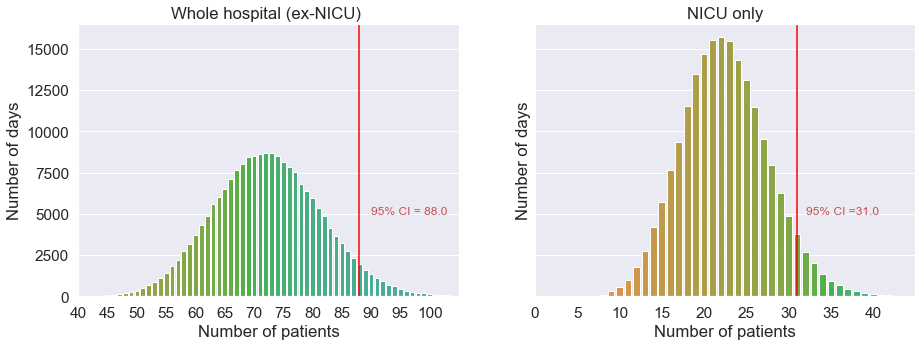

In [234]:
f, axes = plt.subplots(1, 2, figsize=(15, 5), sharex= False, sharey = True)

sns.barplot(x = wh_range, y = wh_count_df, ax = axes[0]).set(xlim = (40, 105), title = 'Whole hospital (ex-NICU) ', xlabel="Number of patients", ylabel='Number of days')
axes[0].axvline(wh_95ci, color='red')
plt.sca(axes[0])
plt.xticks(ticks = np.arange(40, 105, 5), labels = np.arange(40, 105, 5))
axes[0].text(90,5000,'95% CI = '+ str(wh_95ci), fontsize=12, color = 'r')

sns.barplot(x = nicu_count_df.index, y = nicu_count_df, ax = axes[1]).set(xlim= (10,45), title = 'NICU only', xlabel="Number of patients", ylabel='Number of days')
axes[1].axvline(nicu_peace_cis[-3], color='red')
plt.sca(axes[1])
plt.xticks(ticks = np.arange(0, 45, 5), labels = np.arange(0, 45, 5))
axes[1].text(32, 5000,'95% CI =' + str(nicu_peace_cis[-3]), fontsize=12, color = 'r')


print('NICU_n = ', np.sum(nicu_count_df))
print('Whole hosp (ex-NICU) n = ', np.sum(wh_count_df))

sns.set(font_scale=1.4)

# f.savefig('peace_wh_dists.png', dpi=100)

## 3.2 ICU graphs
### 3.2.1 Peacetime ICU Service

Here we show the confidence level required to meet patient demand at the ICU level under normal scenario

In [239]:
with open('cis_pericu_peace3.pkl', 'rb') as f:
    cis_per_icu = pickle.load(f)
    
cis_per_icu

,0.000,0.025,0.050,0.075,0.100,0.125,0.150,0.175,0.200,0.225,...,0.775,0.800,0.825,0.850,0.875,0.900,0.925,0.950,0.975,1.000
CCU,0.0,4.0,5.0,5.0,6.0,6.0,6.0,7.0,7.0,7.0,...,12.0,13.0,13.0,13.0,14.0,14.0,15.0,16.0,17.0,26.0
CSRU,0.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,5.0,...,9.0,9.0,9.0,10.0,10.0,11.0,11.0,12.0,13.0,25.0
NICU,6.0,13.0,14.0,15.0,16.0,17.0,17.0,18.0,18.0,19.0,...,26.0,27.0,27.0,28.0,28.0,29.0,30.0,31.0,33.0,49.0
MICU,9.0,22.0,24.0,25.0,26.0,27.0,28.0,28.0,29.0,29.0,...,39.0,40.0,40.0,41.0,42.0,43.0,44.0,45.0,48.0,67.0
TSICU,0.0,5.0,6.0,6.0,7.0,7.0,7.0,8.0,8.0,8.0,...,13.0,13.0,14.0,14.0,15.0,15.0,16.0,16.0,18.0,27.0
SICU,0.0,5.0,5.0,6.0,6.0,7.0,7.0,7.0,8.0,8.0,...,13.0,13.0,14.0,14.0,14.0,15.0,16.0,16.0,18.0,30.0


ICU counts df > cis per icu n =  200000
The 95% CIs are:
CCU      16.0
CSRU     12.0
NICU     31.0
MICU     45.0
TSICU    16.0
SICU     16.0
Name: 0.9500000000000001, dtype: float64


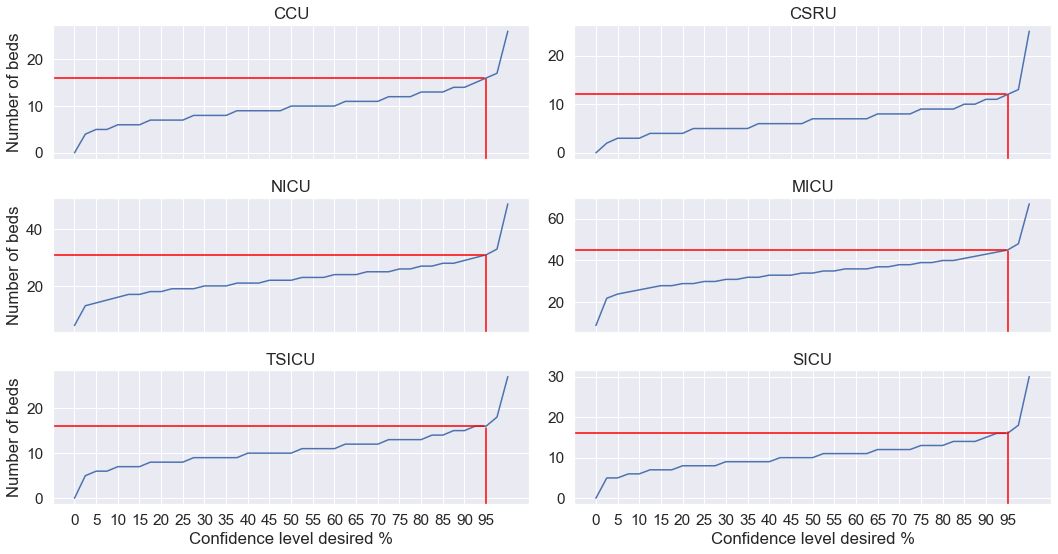

In [246]:
f, axes = plt.subplots(3, 2, figsize=(15, 8), sharex=True, sharey = False)
""

sns.lineplot(x = cis_per_icu.columns, y = cis_per_icu.loc['CCU', :],  ax = axes[0,0]).set( title = 'CCU', xlabel= None, ylabel='Number of beds')
axes[0,0].axvline(0.95 , ymax = 0.60, color='red')
axes[0,0].axhline(cis_per_icu.iloc[:, -3].CCU , xmax = 0.905, color='red')

sns.lineplot(x = cis_per_icu.columns, y = cis_per_icu.loc['CSRU', :],  ax = axes[0,1]).set( title = 'CSRU', xlabel = None, ylabel= None)
axes[0,1].axvline(0.95 , ymax = 0.48,  color='red')
axes[0,1].axhline(cis_per_icu.iloc[:, -3].CSRU , xmax = 0.905, color='red')

sns.lineplot(x = cis_per_icu.columns, y = cis_per_icu.loc['NICU', :],  ax = axes[1,0]).set( title = 'NICU', xlabel= None, ylabel= 'Number of beds')
axes[1,0].axvline(0.95 , ymax = 0.575, color='red')
axes[1,0].axhline(cis_per_icu.iloc[:, -3].NICU , xmax = 0.905, color='red')

sns.lineplot(x = cis_per_icu.columns, y = cis_per_icu.loc['MICU', :],   ax = axes[1,1]).set(title = 'MICU', xlabel= None, ylabel= None)
axes[1,1].axvline(0.95 , ymax = 0.60, color='red')
axes[1,1].axhline(cis_per_icu.iloc[:, -3].MICU , xmax = 0.905, color='red')

sns.lineplot(x = cis_per_icu.columns, y = cis_per_icu.loc['TSICU', :],   ax = axes[2,0]).set( title = 'TSICU', xlabel= "Confidence level desired %", ylabel='Number of beds')
axes[2,0].axvline(0.95 , ymax = 0.57,  color='red')
axes[2,0].axhline(cis_per_icu.iloc[:, -3].TSICU , xmax = 0.905, color='red')

sns.lineplot(x = cis_per_icu.columns, y = cis_per_icu.loc['SICU', :],   ax = axes[2,1]).set(title = 'SICU', xlabel= "Confidence level desired %", ylabel= None)
axes[2,1].axvline(0.95 , ymax = 0.54, color='red')
axes[2,1].axhline(cis_per_icu.iloc[:, -3].SICU , xmax = 0.905, color='red')

plt.xticks(ticks = [0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
           labels = [0  , 5, 10 , 15, 20 , 25, 30 , 35, 40 , 45, 50 ,55, 60 , 65, 70 , 75, 80 , 85, 90 , 95])

plt.tight_layout()
sns.set_style("whitegrid")
sns.set(font_scale=1.4)

os.chdir('/Users/.../graphs')
f.savefig('peace_picu_serlevels.png', dpi=100)

print('ICU counts df > cis per icu n = ', len(icu_counts[0]))
print('The 95% CIs are:')
print(cis_per_icu.iloc[:, -3])

### 3.2.2 Peacetime per ICU distributions

Here we graph the distribution of number of beds required to meet patient demand per ICU in peacetime scenario.

In [247]:
with open('barcounts_pericu_peace3.pkl', 'rb') as f:
    count_df = pickle.load(f)
        
with open('counts_peace3.pkl', 'rb') as f:
       icu_counts = pickle.load(f)

In [249]:
cis_per_icu.iloc[:, -3].CCU

16.0

counts_df n =  CCU      200000.0
CSRU     200000.0
NICU     200000.0
MICU     200000.0
TSICU    200000.0
SICU     200000.0
dtype: float64
ICU counts df > cis per icu n =  200000


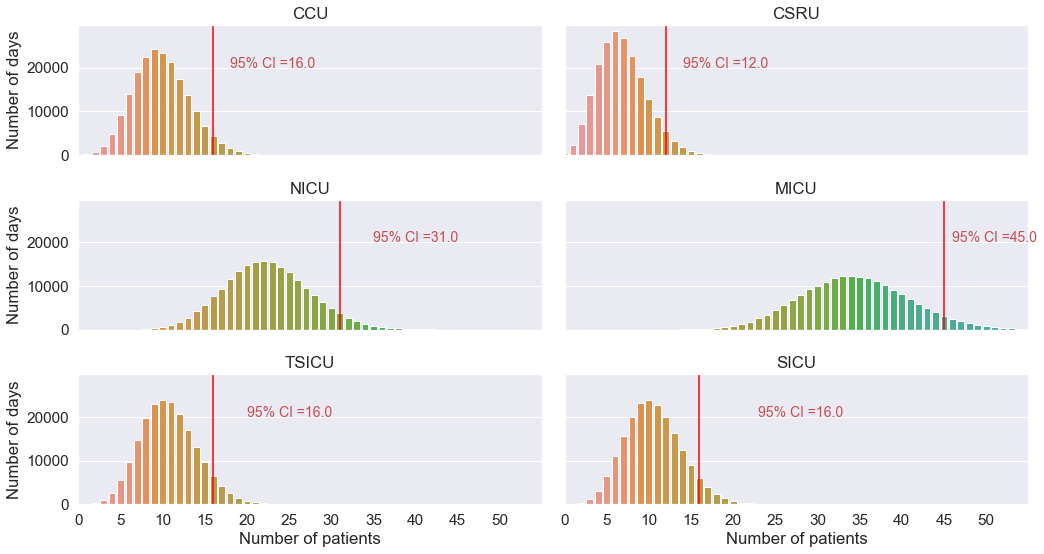

In [252]:
f, axes = plt.subplots(3, 2, figsize=(15, 8), sharex=True, sharey = True)
""

sns.barplot(x = count_df.CCU.index, y = count_df.CCU,  ax = axes[0,0]).set(xlim = (0, 30), title = 'CCU', xlabel=None, ylabel='Number of days')
axes[0,0].axvline(cis_per_icu.iloc[:, -3].CCU, color='red')
axes[0,0].text(18,20000, '95% CI =' + str(cis_per_icu.iloc[:, -3].CCU ), fontsize=14, color = 'r')

sns.barplot(x = count_df.CSRU.index, y = count_df.CSRU , label="Number of patients",  ax = axes[0,1]).set(xlim = (0, 30), title = 'CSRU', xlabel = None, ylabel=None)
axes[0,1].axvline(cis_per_icu.iloc[:, -3].CSRU, color='red')
axes[0,1].text(14,20000, '95% CI =' + str(cis_per_icu.iloc[:, -3].CSRU), fontsize=14, color = 'r')

sns.barplot(x = count_df.NICU.index, y = count_df.NICU, label="Number of patients",  ax = axes[1,0]).set(xlim = (10, 45), title = 'NICU', xlabel= None, ylabel='Number of days')
axes[1,0].axvline(cis_per_icu.iloc[:, -3].NICU, color='red')
axes[1,0].text(35,20000,'95% CI =' + str(cis_per_icu.iloc[:, -3].NICU), fontsize=14, color = 'r')

sns.barplot(x = count_df.MICU.index, y = count_df.MICU, label="Number of patients",  ax = axes[1,1]).set(xlim = (15, 55),title = 'MICU', xlabel= None, ylabel=None)
axes[1,1].axvline(cis_per_icu.iloc[:, -3].MICU, color='red')
axes[1,1].text(46,20000,'95% CI =' + str(cis_per_icu.iloc[:, -3].MICU), fontsize=14, color = 'r')

sns.barplot(x = count_df.TSICU.index, y = count_df.TSICU, label="Number of patients",  ax = axes[2,0]).set(xlim = (0, 30), title = 'TSICU', xlabel="Number of patients", ylabel='Number of days')
axes[2,0].axvline(cis_per_icu.iloc[:, -3].TSICU, color='red')
axes[2,0].text(20,20000,'95% CI =' + str(cis_per_icu.iloc[:, -3].TSICU), fontsize=14, color = 'r')

sns.barplot(x = count_df.SICU.index, y = count_df.SICU, label="Number of patients",  ax = axes[2,1]).set(xlim = (0, 55), title = 'SICU', xlabel="Number of patients", ylabel=None)
axes[2,1].axvline(cis_per_icu.iloc[:, -3].SICU, color='red')
axes[2,1].text(23,20000,'95% CI =' + str(cis_per_icu.iloc[:, -3].SICU), fontsize=14, color = 'r')

plt.xticks(ticks = range(0,55,5), labels = range(0,55,5))

plt.tight_layout()
sns.set(font_scale=1.4)

os.chdir('/Users/chloemaine/Documents/Chloe/BGSE/masters_project/graphs')
f.savefig('peace_pericu_dists.png', dpi=100)

print('counts_df n = ', np.sum(count_df, axis = 0))
print('ICU counts df > cis per icu n = ', len(icu_counts[0]))

# 4. Scenarios


In [133]:
with open('95_cis_scenarios3.pkl', 'rb') as f:
    all_cis = pickle.load(f)
  
with open('all_results_scenarios3.pkl', 'rb') as f:
    all_results = pickle.load(f)

with open('all_counts_scenarios3.pkl', 'rb') as f:
       all_counts = pickle.load(f)
 
with open('all_cis_scenarios3.pkl', 'rb') as f:
       ser_cis = pickle.load(f)


# 4.1 Whole hospital
### 4.1.1 Scenario whole hospital service

Here we show the number of beds required to meet different confidence (service) levels at the whole hospital level under different scenarios

In [124]:
os.chdir('/.../scenarios_runs')

with open('wh_counts_scenarios3.pkl', 'rb') as f:
       wh_counts = pickle.load(f)
        
with open('wh_cis_scenarios3.pkl', 'rb') as f:
       all_scen_wh_cis = pickle.load(f)    

In [131]:
all_scen_wh_cis

,0.000,0.025,0.050,0.075,0.100,0.125,0.150,0.175,0.200,0.225,...,0.775,0.800,0.825,0.850,0.875,0.900,0.925,0.950,0.975,1.000
None,24.0,35.0,37.0,38.0,39.0,40.0,41.0,42.0,42.0,43.0,...,54.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,63.0,88.0
pollen,23.0,35.0,37.0,38.0,39.0,40.0,41.0,41.0,42.0,43.0,...,54.0,55.0,55.0,56.0,57.0,58.0,59.0,61.0,64.0,80.0
pollution,24.0,35.0,37.0,38.0,39.0,40.0,41.0,42.0,42.0,43.0,...,55.0,55.0,56.0,57.0,58.0,59.0,60.0,62.0,65.0,78.0
heat,31.0,39.0,41.0,43.0,44.0,45.0,46.0,46.0,47.0,48.0,...,59.0,60.0,61.0,61.0,62.0,63.0,65.0,66.0,69.0,83.0


In [125]:
len(wh_counts[0])

9988

n= 9988


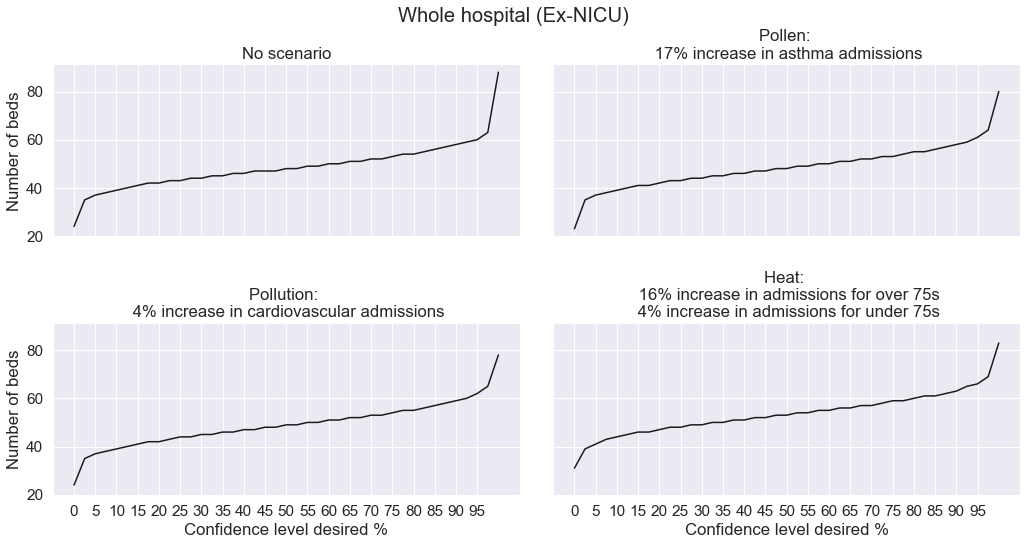

In [127]:
f, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=True, sharey = True)
""
sns.lineplot(x = all_scen_wh_cis.columns, y = all_scen_wh_cis.loc['None', :], color = 'k',  ax = axes[0,0]).set( title = 'No scenario', xlabel= None, ylabel='Number of beds')

sns.lineplot(x = all_scen_wh_cis.columns, y = all_scen_wh_cis.loc['pollen', :], color = 'k',  ax = axes[0,1]).set( title = 'Pollen: \n 17% increase in asthma admissions', xlabel = None, ylabel= None)

sns.lineplot(x = all_scen_wh_cis.columns, y = all_scen_wh_cis.loc['pollution', :],  color = 'k', ax = axes[1,0]).set( title = 'Pollution: \n 4% increase in cardiovascular admissions', xlabel= 'Confidence level desired %', ylabel= 'Number of beds')

sns.lineplot(x = all_scen_wh_cis.columns, y = all_scen_wh_cis.loc['heat', :],   color = 'k', ax = axes[1,1]).set(title = 'Heat: \n 16% increase in admissions for over 75s\n 4% increase in admissions for under 75s', xlabel= 'Confidence level desired %', ylabel= None)

plt.xticks(ticks = [0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
           labels = [0  , 5, 10 , 15, 20 , 25, 30 , 35, 40 , 45, 50 ,55, 60 , 65, 70 , 75, 80 , 85, 90 , 95])

plt.tight_layout(pad = 2)
sns.set_style("darkgrid")
plt.suptitle('Whole hospital (Ex-NICU)')
sns.set(font_scale=1.4)

print('n=', len(wh_counts[0]))

# f.savefig('scens_wh_serlevels.png', dpi=100)

n= 4


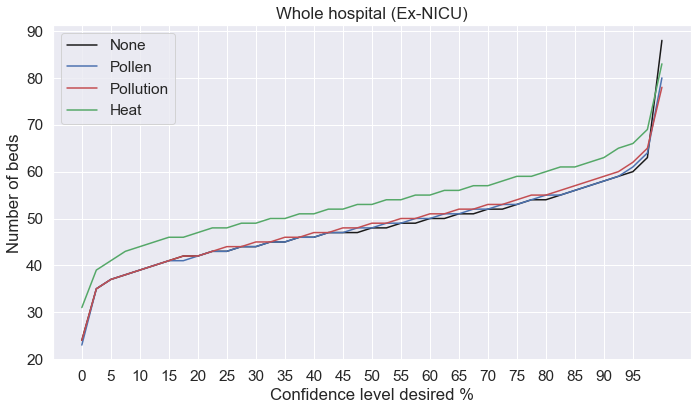

In [129]:
f, axes = plt.subplots(1,1, figsize=(10, 6))

sns.lineplot(x = all_scen_wh_cis.columns, y = all_scen_wh_cis.loc['None', :], label = 'None', color = 'k')
sns.lineplot(x = all_scen_wh_cis.columns, y = all_scen_wh_cis.loc['pollen', :], label = 'Pollen', color = 'b')
sns.lineplot(x = all_scen_wh_cis.columns, y = all_scen_wh_cis.loc['pollution', :], label = 'Pollution', color = 'r')
sns.lineplot(x = all_scen_wh_cis.columns, y = all_scen_wh_cis.loc['heat', :], label = 'Heat',  color = 'g').set(title = 'Whole hospital (Ex-NICU)', xlabel= 'Confidence level desired %', ylabel='Number of beds')

plt.xticks(ticks = [0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
           labels = [0  , 5, 10 , 15, 20 , 25, 30 , 35, 40 , 45, 50 ,55, 60 , 65, 70 , 75, 80 , 85, 90 , 95])

plt.tight_layout()
sns.set_style("whitegrid")
sns.set(font_scale=1.4)

print('n=', len(wh_counts))

f.savefig('scens_wh_serlevels2.png', dpi=100)

### 4.1.2 Scenario whole hospital distribution

### 4.2.1 Scenario per ICU service

Here we graph the number of beds required to meet different confidence (service) levels at the ICU level under different scenarios

In [128]:
with open('all_cis_scenarios3.pkl', 'rb') as f:
       ser_cis = pickle.load(f)

n= 2990


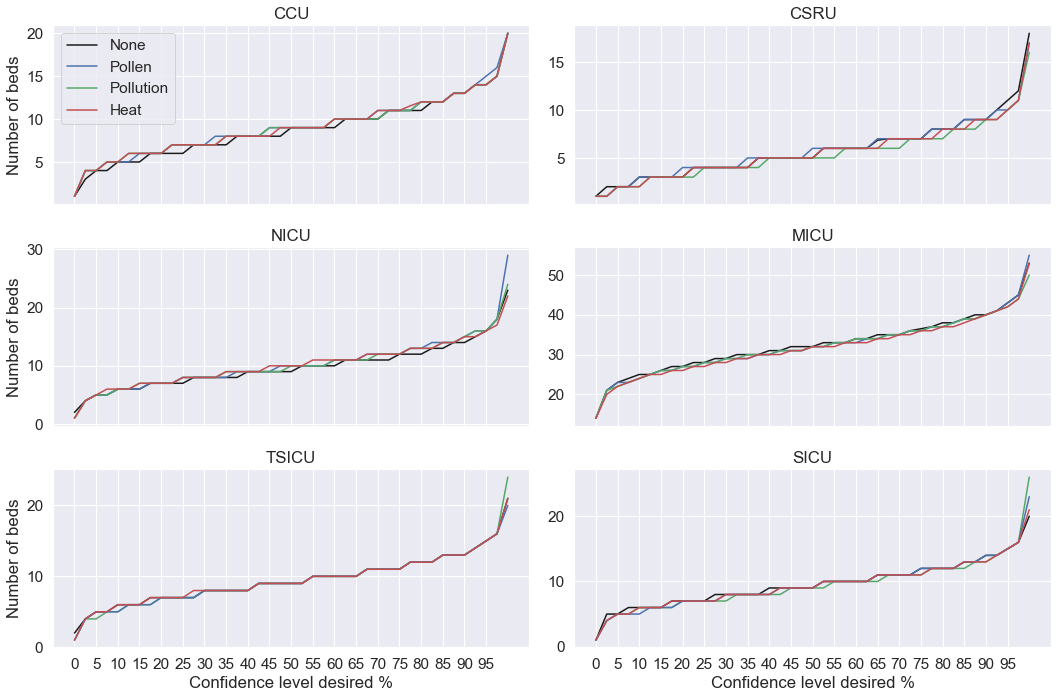

In [131]:
f, axes = plt.subplots(3, 2, figsize=(15, 10), sharex=True, sharey = False)
""

sns.lineplot(x = ser_cis[0].columns, y = ser_cis[0].loc['CCU', :], label = 'None', color = 'k',  ax = axes[0,0]).set( title = 'CCU', xlabel= None, ylabel='Number of beds')
sns.lineplot(x = ser_cis[1].columns, y = ser_cis[1].loc['CCU', :], label = 'Pollen', color = 'b',  ax = axes[0,0]).set( title = 'CCU', xlabel= None, ylabel='Number of beds')
sns.lineplot(x = ser_cis[2].columns, y = ser_cis[2].loc['CCU', :], label = 'Pollution',color = 'g',  ax = axes[0,0]).set( title = 'CCU', xlabel= None, ylabel='Number of beds')
sns.lineplot(x = ser_cis[3].columns, y = ser_cis[3].loc['CCU', :], label = 'Heat', color = 'r',  ax = axes[0,0]).set( title = 'CCU', xlabel= None, ylabel='Number of beds')

sns.lineplot(x = ser_cis[0].columns, y = ser_cis[0].loc['CSRU', :], color = 'k',  ax = axes[0,1]).set( title = 'CSRU', xlabel = None, ylabel= None)
sns.lineplot(x = ser_cis[1].columns, y = ser_cis[1].loc['CSRU', :], color = 'b',  ax = axes[0,1]).set( title = 'CSRU', xlabel = None, ylabel= None)
sns.lineplot(x = ser_cis[2].columns, y = ser_cis[2].loc['CSRU', :], color = 'g',  ax = axes[0,1]).set( title = 'CSRU', xlabel = None, ylabel= None)
sns.lineplot(x = ser_cis[3].columns, y = ser_cis[3].loc['CSRU', :], color = 'r',  ax = axes[0,1]).set( title = 'CSRU', xlabel = None, ylabel= None)

sns.lineplot(x = ser_cis[0].columns, y = ser_cis[0].loc['NICU', :],  color = 'k', ax = axes[1,0]).set( title = 'NICU', xlabel= None, ylabel= 'Number of beds')
sns.lineplot(x = ser_cis[1].columns, y = ser_cis[1].loc['NICU', :],  color = 'b', ax = axes[1,0]).set( title = 'NICU', xlabel= None, ylabel= 'Number of beds')
sns.lineplot(x = ser_cis[2].columns, y = ser_cis[2].loc['NICU', :],  color = 'g', ax = axes[1,0]).set( title = 'NICU', xlabel= None, ylabel= 'Number of beds')
sns.lineplot(x = ser_cis[3].columns, y = ser_cis[3].loc['NICU', :],  color = 'r', ax = axes[1,0]).set( title = 'NICU', xlabel= None, ylabel= 'Number of beds')

sns.lineplot(x = ser_cis[0].columns, y = ser_cis[0].loc['MICU', :],   color = 'k', ax = axes[1,1]).set(title = 'MICU', xlabel= None, ylabel= None)
sns.lineplot(x = ser_cis[1].columns, y = ser_cis[1].loc['MICU', :],   color = 'b', ax = axes[1,1]).set(title = 'MICU', xlabel= None, ylabel= None)
sns.lineplot(x = ser_cis[2].columns, y = ser_cis[2].loc['MICU', :],   color = 'g', ax = axes[1,1]).set(title = 'MICU', xlabel= None, ylabel= None)
sns.lineplot(x = ser_cis[3].columns, y = ser_cis[3].loc['MICU', :],   color = 'r', ax = axes[1,1]).set(title = 'MICU', xlabel= None, ylabel= None)

sns.lineplot(x = ser_cis[0].columns, y = ser_cis[0].loc['TSICU', :],   color = 'k', ax = axes[2,0]).set( title = 'TSICU', xlabel= "Confidence level desired %", ylabel='Number of beds')
sns.lineplot(x = ser_cis[1].columns, y = ser_cis[1].loc['TSICU', :],   color = 'g', ax = axes[2,0]).set( title = 'TSICU', xlabel= "Confidence level desired %", ylabel='Number of beds')
sns.lineplot(x = ser_cis[2].columns, y = ser_cis[2].loc['TSICU', :],   color = 'b', ax = axes[2,0]).set( title = 'TSICU', xlabel= "Confidence level desired %", ylabel='Number of beds')
sns.lineplot(x = ser_cis[3].columns, y = ser_cis[3].loc['TSICU', :],   color = 'r', ax = axes[2,0]).set( title = 'TSICU', xlabel= "Confidence level desired %", ylabel='Number of beds')

sns.lineplot(x = ser_cis[0].columns, y = ser_cis[0].loc['SICU', :],   color = 'k', ax = axes[2,1]).set(title = 'SICU', xlabel= "Confidence level desired %", ylabel= None)
sns.lineplot(x = ser_cis[1].columns, y = ser_cis[1].loc['SICU', :],   color = 'g', ax = axes[2,1]).set(title = 'SICU', xlabel= "Confidence level desired %", ylabel= None)
sns.lineplot(x = ser_cis[2].columns, y = ser_cis[2].loc['SICU', :],   color = 'b', ax = axes[2,1]).set(title = 'SICU', xlabel= "Confidence level desired %", ylabel= None)
sns.lineplot(x = ser_cis[3].columns, y = ser_cis[3].loc['SICU', :],   color = 'r', ax = axes[2,1]).set(title = 'SICU', xlabel= "Confidence level desired %", ylabel= None)

plt.xticks(ticks = [0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
           labels = [0  , 5, 10 , 15, 20 , 25, 30 , 35, 40 , 45, 50 ,55, 60 , 65, 70 , 75, 80 , 85, 90 , 95])

plt.tight_layout()
sns.set_style("darkgrid")
sns.set(font_scale=1.4)

print('n=', len(wh_counts[0]))

# f.savefig('scens_picu_serlevels.png', dpi=100)

### 4.2.2 Scenario per ICU distribution

Here we graph the distribution of bed numbers required to meet different confidence (service) levels at the ICU level under different scenarios

In [216]:
os.chdir('/.../scenarios_runs')

with open('all_cis_scenarios3.pkl', 'rb') as f:
       ser_cis = pickle.load(f)
        
with open('all_counts_scenarios3.pkl', 'rb') as f:
       all_counts = pickle.load(f)
        
with open('95_cis_scenarios3.pkl', 'rb') as f:
       cis_95 = pickle.load(f)
        
all_cis = ser_cis


In [99]:
cis_95

,CCU,CSRU,NICU,MICU,TSICU,SICU
None,15.2,12.0,29.6,44.6,16.2,16.2
pollen,15.4,12.2,31.4,45.0,16.0,16.6
pollution,15.4,13.0,30.4,45.2,16.4,17.0
heat,15.2,12.0,31.8,44.8,16.4,16.4


In [106]:
cis_95

,CCU,CSRU,NICU,MICU,TSICU,SICU
None,15.6,11.5,75.7,16.9,16.4,15.8
pollen,15.5,11.6,76.2,17.0,16.1,16.0
pollution,16.0,11.6,76.0,17.4,16.5,15.9
heat,16.5,12.4,78.5,19.1,17.0,17.3


In [257]:
print(all_cis[0].iloc[:, -3], all_cis[1].iloc[:, -3], all_cis[2].iloc[:, -3], all_cis[3].iloc[:, -3])

CCU      16.0
CSRU     12.0
NICU     31.0
MICU     45.0
TSICU    16.0
SICU     16.0
Name: 0.9500000000000001, dtype: float64 CCU      16.0
CSRU     12.0
NICU     31.0
MICU     45.0
TSICU    16.0
SICU     16.0
Name: 0.9500000000000001, dtype: float64 CCU      16.0
CSRU     12.0
NICU     31.0
MICU     45.0
TSICU    16.0
SICU     16.0
Name: 0.9500000000000001, dtype: float64 CCU      16.0
CSRU     12.0
NICU     34.0
MICU     46.0
TSICU    17.0
SICU     17.0
Name: 0.9500000000000001, dtype: float64


In [113]:
all_counts[0]

,0,1,2,3,4,5,6,7,8,9,...,10000,10001,10002,10003,10004,10005,10006,10007,10008,10009
CCU,12,12,10,9,4,5,4,3,7,8,...,14.0,10.0,7.0,6.0,6.0,7.0,7.0,9.0,9.0,NaN
CSRU,9,6,6,7,8,9,8,5,6,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NICU,51,53,61,62,63,59,61,67,70,68,...,80.0,78.0,80.0,82.0,79.0,77.0,78.0,74.0,76.0,76.0
MICU,10,11,9,8,9,8,8,11,12,11,...,10.0,12.0,10.0,13.0,13.0,12.0,10.0,9.0,10.0,10.0
TSICU,11,12,10,11,12,11,9,10,9,8,...,9.0,8.0,8.0,6.0,8.0,8.0,10.0,12.0,12.0,NaN
SICU,14,14,9,9,6,4,4,5,12,14,...,20.0,18.0,17.0,15.0,17.0,16.0,14.0,15.0,15.0,13.0


In [264]:
import math
cis_95 = math.ceil(cis_95)

TypeError: must be real number, not DataFrame

In [265]:
cis_95

,CCU,CSRU,NICU,MICU,TSICU,SICU
None,15.63525,11.75150,30.790,45.210,16.320,16.31
pollen,15.52000,11.83600,30.805,45.355,16.295,16.35
pollution,15.84500,11.75825,30.775,45.265,16.345,16.28
heat,16.42525,12.34625,33.475,46.290,17.110,17.07


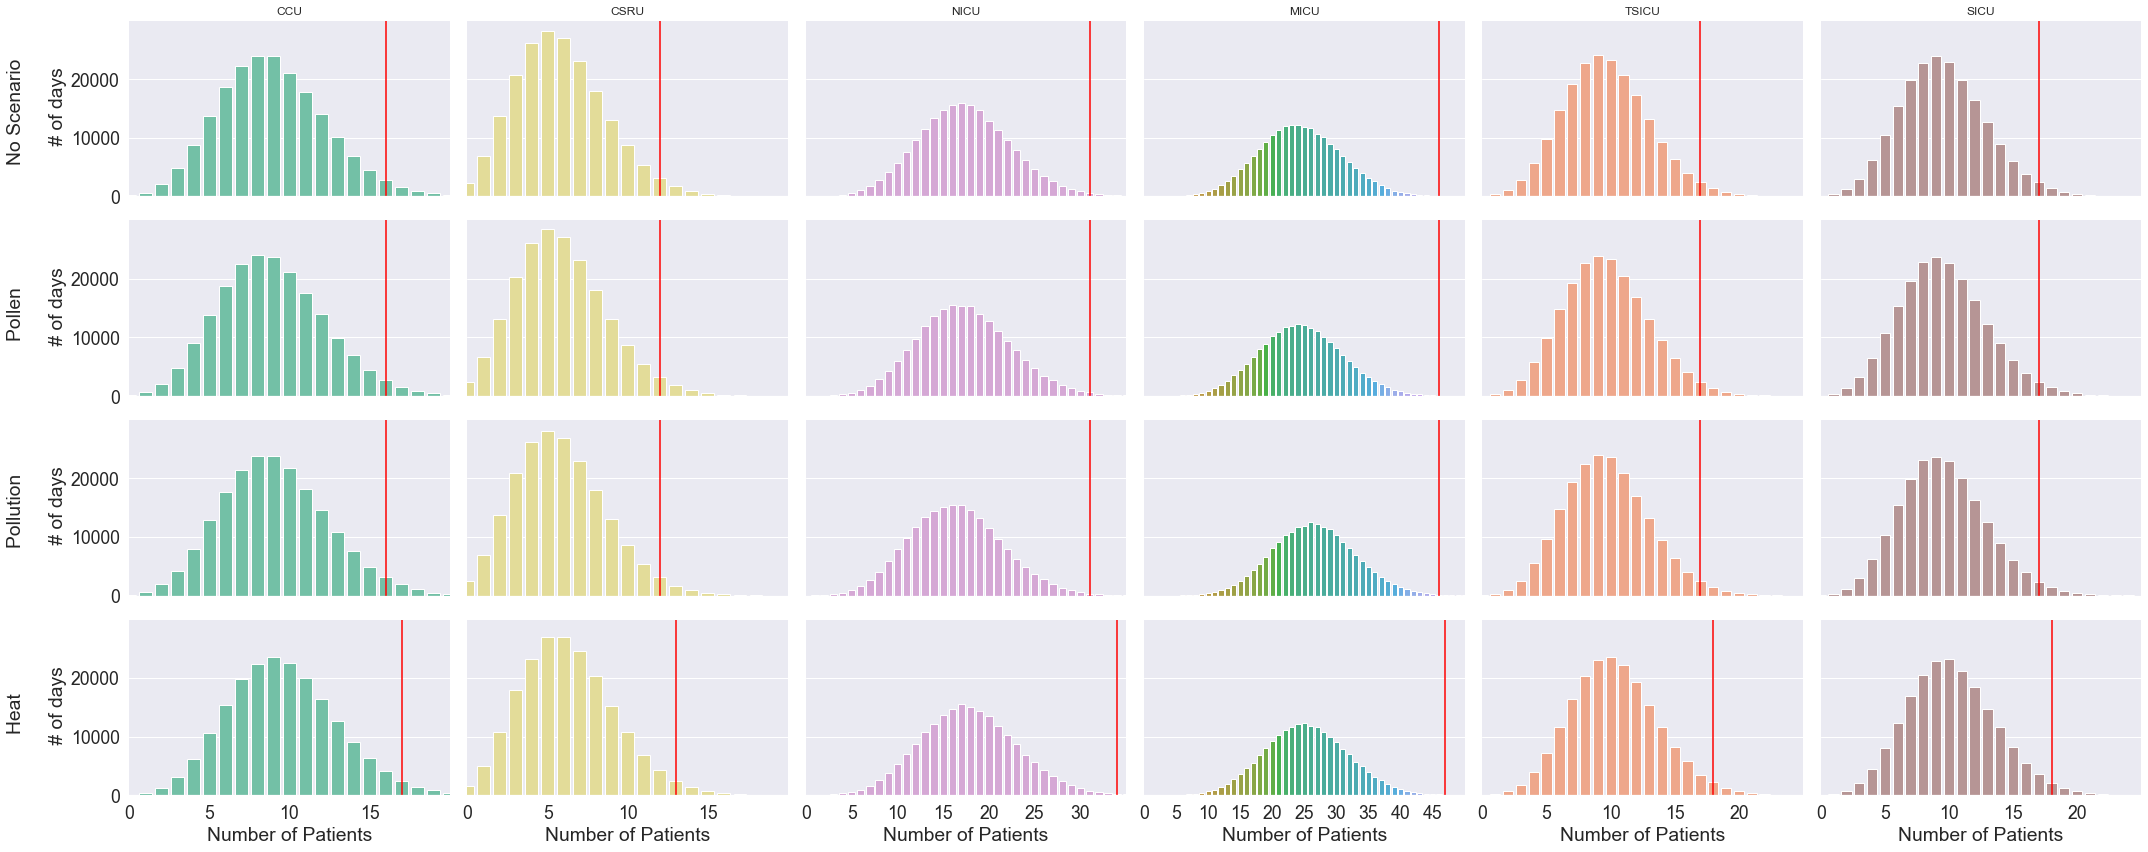

In [272]:
# Plot
f, axes = plt.subplots(4, 6, figsize=(30, 12), sharex= False, sharey = True)

ci_colour = 'red'
sns.set(style="whitegrid")

sns.barplot(x = np.transpose(all_counts[0]).groupby('CCU').CSRU.count().index, y = np.transpose(all_counts[0]).groupby('CCU').CSRU.count(),ax = axes[0,0],
            color = 'mediumaquamarine').set(xlim=(0,20), xlabel= None,  xticks = [], ylabel='No Scenario \n\n # of days', title = 'CCU')
axes[0,0].axvline(math.ceil(cis_95.loc['None', 'CCU']), color=ci_colour )
sns.barplot(x = np.transpose(all_counts[1]).groupby('CCU').CSRU.count().index, y = np.transpose(all_counts[1]).groupby('CCU').CSRU.count(), ax = axes[1,0],
            color = 'mediumaquamarine').set(xlim = (0,20), xlabel= None, xticks = [], ylabel='Pollen  \n\n # of days'  )
axes[1,0].axvline(math.ceil(cis_95.loc['pollen', 'CCU']), color=ci_colour)
sns.barplot(x = np.transpose(all_counts[2]).groupby('CCU').CSRU.count().index, y = np.transpose(all_counts[2]).groupby('CCU').CSRU.count(),ax = axes[2,0],
            color = 'mediumaquamarine').set(xlim = (0,20), xlabel= None, ylabel='Pollution \n\n # of days', xticks = [])
axes[2,0].axvline(math.ceil(cis_95.loc['pollution', 'CCU']), color=ci_colour)
sns.barplot(x = np.transpose(all_counts[3]).groupby('CCU').CSRU.count().index, y = np.transpose(all_counts[3]).groupby('CCU').CSRU.count(),ax = axes[3,0],
            color = 'mediumaquamarine').set(xlim = (0,20), xlabel= 'Number of Patients', ylabel='Heat  \n\n # of days')
axes[3,0].axvline(math.ceil(cis_95.loc['heat', 'CCU']), color=ci_colour)
plt.sca(axes[3, 0])
plt.xticks(ticks = np.arange(0,20,5), labels = np.arange(0,20,5))

sns.barplot(x = np.transpose(all_counts[0]).groupby('CSRU').CCU.count().index, y = np.transpose(all_counts[0]).groupby('CSRU').CCU.count(), ax = axes[0,1],
            color = 'khaki').set(xlim=(0,20),  xlabel= None, title = 'CSRU', ylabel = None, xticks = [])
axes[0,1].axvline(math.ceil(cis_95.loc['None', 'CSRU']), color=ci_colour)
sns.barplot(x = np.transpose(all_counts[1]).groupby('CSRU').CCU.count().index, y = np.transpose(all_counts[1]).groupby('CSRU').CCU.count(), ax = axes[1,1],
            color = 'khaki').set(xlim = (0,20), xlabel= None, ylabel = None, xticks = [])
axes[1,1].axvline(math.ceil(cis_95.loc['pollen', 'CSRU']), color=ci_colour)
sns.barplot(x = np.transpose(all_counts[2]).groupby('CSRU').CCU.count().index, y = np.transpose(all_counts[2]).groupby('CSRU').CCU.count(), ax = axes[2,1],
            color = 'khaki').set(xlim = (0,20), xlabel= None, ylabel = None, xticks = [])
axes[2,1].axvline(math.ceil(cis_95.loc['pollution', 'CSRU']), color=ci_colour)
sns.barplot(x = np.transpose(all_counts[3]).groupby('CSRU').CCU.count().index, y = np.transpose(all_counts[3]).groupby('CSRU').CCU.count(), ax = axes[3,1],
            color = 'khaki').set(xlim = (0,20), xlabel= 'Number of Patients', ylabel = None)
axes[3,1].axvline(math.ceil(cis_95.loc['heat', 'CSRU']), color=ci_colour)
plt.sca(axes[3, 1])
plt.xticks(ticks = np.arange(0,20,5), labels = np.arange(0,20,5))

sns.barplot(x = np.transpose(all_counts[0]).groupby('NICU').CSRU.count().index, y = np.transpose(all_counts[0]).groupby('NICU').CSRU.count(), ax = axes[0,2],
            color = 'plum').set(xlim=(0,35), xlabel= None, title = 'NICU', ylabel = None, xticks = [])
axes[0,2].axvline(math.ceil(cis_95.loc['None', 'NICU']), color=ci_colour)
sns.barplot(x = np.transpose(all_counts[1]).groupby('NICU').CSRU.count().index, y = np.transpose(all_counts[1]).groupby('NICU').CSRU.count(), ax = axes[1,2],
            color = 'plum').set(xlim=(0,35),  xlabel= None, ylabel = None, xticks = [])
axes[1,2].axvline(math.ceil(cis_95.loc['pollen', 'NICU']),color=ci_colour)
sns.barplot(x = np.transpose(all_counts[2]).groupby('NICU').CSRU.count().index, y = np.transpose(all_counts[2]).groupby('NICU').CSRU.count(), ax = axes[2,2],
            color = 'plum').set(xlim=(0,35),  xlabel= None, ylabel = None, xticks = [])
axes[2,2].axvline(math.ceil(cis_95.loc['pollution', 'NICU']), color=ci_colour)
sns.barplot(x = np.transpose(all_counts[3]).groupby('NICU').CSRU.count().index, y = np.transpose(all_counts[3]).groupby('NICU').CSRU.count(), ax = axes[3,2],
            color = 'plum').set(xlim=(0,35), xlabel= 'Number of Patients', ylabel = None)
axes[3,2].axvline(math.ceil(cis_95.loc['heat', 'NICU']), color=ci_colour)
plt.sca(axes[3, 2])
plt.xticks(ticks = np.arange(0,35,5), labels = np.arange(0,35,5))

sns.barplot(x = np.transpose(all_counts[0]).groupby('MICU').CSRU.count().index, y = np.transpose(all_counts[0]).groupby('MICU').CSRU.count(),
            ax = axes[0,3]).set(xlim=(0,50), xlabel= None, title = 'MICU', ylabel = None, xticks = [])
axes[0,3].axvline(math.ceil(cis_95.loc['None', 'MICU']), color=ci_colour)
sns.barplot(x = np.transpose(all_counts[1]).groupby('MICU').CSRU.count().index, y = np.transpose(all_counts[1]).groupby('MICU').CSRU.count(),
            ax = axes[1,3]).set(xlim=(0,50), xlabel= None, ylabel = None, xticks = [])
axes[1,3].axvline(math.ceil(cis_95.loc['pollen', 'MICU']), color=ci_colour)
sns.barplot(x = np.transpose(all_counts[2]).groupby('MICU').CSRU.count().index, y = np.transpose(all_counts[2]).groupby('MICU').CSRU.count(),
            ax = axes[2,3]).set(xlim=(0,50), xlabel= None, ylabel = None, xticks = [])
axes[2,3].axvline(math.ceil(cis_95.loc['pollution', 'MICU']), color=ci_colour)
sns.barplot(x = np.transpose(all_counts[3]).groupby('MICU').CSRU.count().index, y = np.transpose(all_counts[3]).groupby('MICU').CSRU.count(),
            ax = axes[3,3]).set(xlim=(0,50), xlabel= 'Number of Patients', ylabel = None)
axes[3,3].axvline(math.ceil(cis_95.loc['heat', 'MICU']), color=ci_colour)
plt.sca(axes[3, 3])
plt.xticks(ticks = np.arange(0,50,5), labels = np.arange(0,50,5))

sns.barplot(x = np.transpose(all_counts[0]).groupby('TSICU').CSRU.count().index, y = np.transpose(all_counts[0]).groupby('TSICU').CSRU.count(), ax = axes[0,4],
            color = 'lightsalmon').set(xlim=(0,25), xlabel= None, title = 'TSICU', ylabel = None, xticks = [])
axes[0,4].axvline(math.ceil(cis_95.loc['None', 'TSICU']), color=ci_colour)
sns.barplot(x = np.transpose(all_counts[1]).groupby('TSICU').CSRU.count().index, y = np.transpose(all_counts[1]).groupby('TSICU').CSRU.count(), ax = axes[1,4],
            color = 'lightsalmon').set(xlim=(0,25), xlabel= None, ylabel = None, xticks = [])
axes[1,4].axvline(math.ceil(cis_95.loc['pollen', 'TSICU']), color=ci_colour)
sns.barplot(x = np.transpose(all_counts[2]).groupby('TSICU').CSRU.count().index, y = np.transpose(all_counts[2]).groupby('TSICU').CSRU.count(), ax = axes[2,4],
            color = 'lightsalmon').set(xlim=(0,25), xlabel= None, ylabel = None, xticks = [])
axes[2,4].axvline(math.ceil(cis_95.loc['pollution', 'TSICU']), color=ci_colour)
sns.barplot(x = np.transpose(all_counts[3]).groupby('TSICU').CSRU.count().index, y = np.transpose(all_counts[3]).groupby('TSICU').CSRU.count(), ax = axes[3,4],
            color = 'lightsalmon').set(xlim=(0,25), xlabel= 'Number of Patients', ylabel = None)
axes[3,4].axvline(math.ceil(cis_95.loc['heat', 'TSICU']), color=ci_colour)
plt.sca(axes[3, 4])
plt.xticks(ticks = np.arange(0,25,5), labels = np.arange(0,25,5))

sns.barplot(x =np.transpose(all_counts[0]).groupby('SICU').CSRU.count().index, y = np.transpose(all_counts[0]).groupby('SICU').CSRU.count(), ax = axes[0,5],
            color = 'rosybrown').set(xlim=(0,25), xlabel= None, title = 'SICU', ylabel = None, xticks = [])
axes[0,5].axvline(math.ceil(cis_95.loc['None', 'SICU']),color=ci_colour)
sns.barplot(x =  np.transpose(all_counts[1]).groupby('SICU').CSRU.count().index, y = np.transpose(all_counts[1]).groupby('SICU').CSRU.count(), ax = axes[1,5],
            color = 'rosybrown').set(xlim=(0,25), xlabel= None, ylabel = None, xticks = [])
axes[1,5].axvline(math.ceil(cis_95.loc['pollen', 'SICU']), color=ci_colour)
sns.barplot(x = np.transpose(all_counts[2]).groupby('SICU').CSRU.count().index, y = np.transpose(all_counts[2]).groupby('SICU').CSRU.count(), ax = axes[2,5],
            color = 'rosybrown').set(xlim=(0,25), xlabel=  None, ylabel = None, xticks = [])
axes[2,5].axvline(math.ceil(cis_95.loc['pollution', 'SICU']), color=ci_colour)
sns.barplot(x = np.transpose(all_counts[3]).groupby('SICU').CSRU.count().index, y = np.transpose(all_counts[3]).groupby('SICU').CSRU.count(), ax = axes[3,5],
            color = 'rosybrown').set(xlim=(0,25), xlabel= 'Number of Patients', ylabel = None)
axes[3,5].axvline(math.ceil(cis_95.loc['heat', 'SICU']), color=ci_colour)
plt.sca(axes[3, 5])
plt.xticks(ticks = np.arange(0,25,5), labels = np.arange(0,25,5))

sns.despine(left= True)
plt.tight_layout()
sns.set(font_scale=1.6)

os.chdir('/Users/chloemaine/Documents/Chloe/BGSE/masters_project/graphs')
f.savefig('pollen_pollution_scenarios_bar3.png', dpi=100)